In [78]:
import scipy.stats as sts
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.linalg as LA

### Question 1

#### 1(a)

In [17]:
rho = 0.85
mu = 11.4
T = 500
sigma = 0.7
# AR(1) process: Z_tpl = rho*Z_t + (1-rho)*mu + epsilon
#simulate epsilon vector
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T,
random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)
z_vec = np.zeros(T)
z_t = mu

In [18]:
for i in range(T):
    z_vec[i] = z_t
    z_tpl = rho*z_t + (1-rho)*mu + eps_vec[i]
    z_t = z_tpl

Text(0.5, 1.0, 'Simulated AR(1) Process')

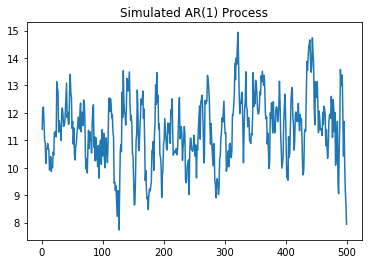

In [19]:
plt.plot(np.arange(1, T+1), z_vec)
plt.title("Simulated AR(1) Process")

#### 1(b)

In [23]:
z_vals = np.array([mu-3*sigma, mu-1.5*sigma, mu, mu+1.5*sigma, mu+3*sigma])
z_vals

array([ 9.3 , 10.35, 11.4 , 12.45, 13.5 ])

#### 1(c)

In [27]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
z_cuts

array([ 9.825, 10.875, 11.925, 12.975])

#### 1(d)

In [88]:
P = np.zeros((5,5))
def classify(z):
    if z<z_cuts[0]:
        return 1
    elif (z>=z_cuts[0]) & (z<z_cuts[1]):
        return 2
    elif (z>=z_cuts[1]) & (z<z_cuts[2]):
        return 3
    elif (z>=z_cuts[2]) & (z<z_cuts[3]):
        return 4
    elif z>=z_cuts[3]:
        return 5
z_bins = np.array([classify(z) for z in z_vec])
len(z_bins)

500

In [89]:
for j in range(1,6):
    for k in range(1, 6):
        P[j-1, k-1] = sum([(z_bins[i]==j) & (z_bins[i+1]==k) for i in range(T-1)])
P_sum = np.tile(P.sum(1), (5,1)).T
P = P/P_sum

In [91]:
P.sum(1)

array([1., 1., 1., 1., 1.])

In [92]:
z_t3 = np.array([0,0,1,0,0])
z_t5 = np.dot(LA.matrix_power(P.T, 3), z_t3)
z_t5

array([0.07251875, 0.24474395, 0.356121  , 0.24602846, 0.08058785])

The probability that $z_{t+3}$ being in bin 5 given that $z_t$ is in bin 3 today is 8%

#### 1(e)

In [126]:
Z_t = np.array([[0.2], [0.2], [0.2], [0.2], [0.2]])
Sims = 60
Zmat = np.zeros((Sims, 5))
Zmat[0,:] = Z_t.flatten()

for sim in range(1, Sims):
    Z_tp1 = np.dot(P.T, Z_t)
    Zmat[sim, :] = Z_tp1.flatten()
    Z_t = Z_tp1
print(Zmat)

[[0.2        0.2        0.2        0.2        0.2       ]
 [0.16193089 0.21647247 0.24691569 0.2246818  0.14999915]
 [0.13869872 0.22655756 0.27970311 0.23083756 0.12420306]
 [0.12465068 0.23326819 0.29885275 0.23273844 0.11048994]
 [0.11619162 0.23743781 0.30975644 0.23350094 0.10311318]
 [0.11109067 0.23986564 0.31596684 0.23393825 0.09913861]
 [0.10799565 0.24120107 0.31952    0.234271   0.09701228]
 [0.10609857 0.24189127 0.32156268 0.2345535  0.09589397]
 [0.10491988 0.24221735 0.32274267 0.23479619 0.09532392]
 [0.10417539 0.24234668 0.3234278  0.23500094 0.0950492 ]
 [0.10369629 0.24237518 0.32382794 0.23516994 0.09493065]
 [0.10338173 0.24235603 0.32406328 0.23530683 0.09489213]
 [0.10317089 0.24231772 0.32420287 0.2354161  0.09489243]
 [0.10302668 0.24227478 0.32428654 0.23550236 0.09490965]
 [0.10292615 0.24223409 0.32433732 0.23556991 0.09493253]
 [0.10285485 0.24219847 0.32436859 0.23562248 0.0949556 ]
 [0.10280352 0.24216865 0.32438819 0.23566322 0.09497642]
 [0.1027661  0

In [128]:
print("The stationary distribution of $z_t$ is", Zmat[-1, :])

The stationary distribution of $z_t$ is [0.1026548  0.24205688 0.32442728 0.23579876 0.09506228]


#### 1(f)

In [147]:
import scipy.stats as sts

z_0 = z_vals[2]
z_vec = np.zeros(T)

z_t = z_0
zt_ind = 2
for t_ind in range(T):
    # Calculate new index and new value
    ztp1_ind = \
        np.argwhere(unif_vec[t_ind] <= np.cumsum(P[zt_ind, :])).min()
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    #print(zt_ind, ztp1_ind)
    
    # Update the current value and its index in the loop
    z_t = z_tp1
    zt_ind = ztp1_ind

Text(0, 0.5, '$z_t$')

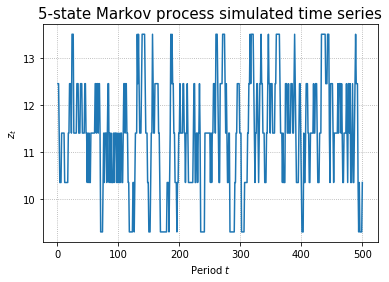

In [137]:
plt.plot(np.arange(1, T + 1), z_vec, '-')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.title(r'5-state Markov process simulated time series', fontsize=15)
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$')